## DC Crime data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors


from shapely.geometry import box
from shapely.plotting import plot_polygon, plot_points

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

from shapely.geometry import box
from shapely.plotting import plot_polygon, plot_points

import geopandas as gpd

from shapely import STRtree,buffer

import warnings
warnings.simplefilter(action='ignore', category=Warning)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder

#seting up palette 
palette = ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"]
sns.set(rc={"axes.facecolor":"#e6e6e6","figure.facecolor":"#f5f5f5"})
cmap = colors.ListedColormap( ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"])

Matplotlib created a temporary cache directory at /tmp/matplotlib-zmev974m because the default path (/home/sijic/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
#seting up palette 
palette = ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"]
sns.set(rc={"axes.facecolor":"#e6e6e6","figure.facecolor":"#f5f5f5"})
cmap = colors.ListedColormap( ["#FAC8BE", "#80E1C6", "#FFB3E1", "#6CC3FC", "#FFD168", "#C894E1"])

In [3]:
# Load the dataset
df = pd.read_csv('./data/dc-crimes-search-results.csv')
# Display the first 5 rows of the dataset
df.head()

,NEIGHBORHOOD_CLUSTER,offensegroup,CENSUS_TRACT,LONGITUDE,END_DATE,offense-text,SHIFT,DISTRICT,YBLOCK,WARD,...,BLOCK,START_DATE,CCN,OFFENSE,OCTO_RECORD_ID,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,cluster 1,violent,3901.0,-77.042388,"1/26/2024, 1:30:00 AM",robbery,midnight,3.0,139443.47,1.0,...,1781 - 1799 block of columbia road nw,"1/26/2024, 12:12:00 AM",24012613,robbery,NaN,1C,"1/26/2024, 1:47:11 AM",others,"38.9228569969,-77.0423881078",38.922857
1,cluster 7,property,4902.0,-77.023966,"3/13/2024, 1:52:00 AM",burglary,midnight,3.0,137783.52,2.0,...,1300 - 1399 block of 9th street nw,"3/13/2024, 1:49:00 AM",24038039,burglary,NaN,2G,"3/13/2024, 3:00:37 AM",others,"38.9079088435,-77.0239664272",38.907909
2,cluster 34,property,7709.0,-76.970003,"4/20/2022, 6:20:00 PM",theft/other,evening,6.0,133930.00,7.0,...,2500 - 2599 block of pennsylvania avenue se,"4/20/2022, 5:31:00 PM",22054890,theft/other,NaN,7B,"4/20/2022, 6:21:32 PM",others,"38.8731935018,-76.9700033858",38.873194
3,cluster 9,property,10202.0,-77.024569,"5/2/2023, 4:37:00 PM",motor vehicle theft,evening,1.0,135116.46,6.0,...,400 - 999 block of l'enfant plaza sw,"5/1/2023, 3:19:00 PM",23067849,motor vehicle theft,NaN,6D,"5/1/2023, 4:36:19 PM",others,"38.8838828674,-77.0245692132",38.883883
4,cluster 22,property,9102.0,-76.993756,"2/21/2024, 11:30:00 AM",theft/other,day,5.0,139301.40,5.0,...,2300 - 2499 block of washington place ne,"2/21/2024, 11:03:00 AM",24026990,theft/other,NaN,5C,"2/21/2024, 12:01:28 PM",others,"38.9215847053,-76.9937555941",38.921585


In [4]:
# change columns' name
for col in df.columns:
    df[col.lower()]=df[col]
    try:
        df = df.drop(col.upper(), axis=1)
    except:
        pass

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61826 entries, 0 to 61825
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offensegroup          61826 non-null  object 
 1   offense-text          61826 non-null  object 
 2   offensekey            61826 non-null  object 
 3   sector                61386 non-null  object 
 4   ucr-rank              61826 non-null  int64  
 5   location              61826 non-null  object 
 6   neighborhood_cluster  61819 non-null  object 
 7   census_tract          61803 non-null  float64
 8   longitude             61826 non-null  float64
 9   end_date              56824 non-null  object 
 10  shift                 61826 non-null  object 
 11  district              61412 non-null  float64
 12  yblock                61826 non-null  float64
 13  ward                  61819 non-null  float64
 14  year                  61826 non-null  int64  
 15  bid                

In [6]:
# Check for null values
df.isnull().sum()

offensegroup                0
offense-text                0
offensekey                  0
sector                    440
ucr-rank                    0
location                    0
neighborhood_cluster        7
census_tract               23
longitude                   0
end_date                 5002
shift                       0
district                  414
yblock                      0
ward                        7
year                        0
bid                     50373
psa                       440
block_group                25
voting_precinct             8
xblock                      0
block                       0
start_date                 10
ccn                         0
offense                     0
octo_record_id          61826
anc                         7
report_dat                  0
method                      0
latitude                    0
dtype: int64

<Figure size 2000x2000 with 0 Axes>

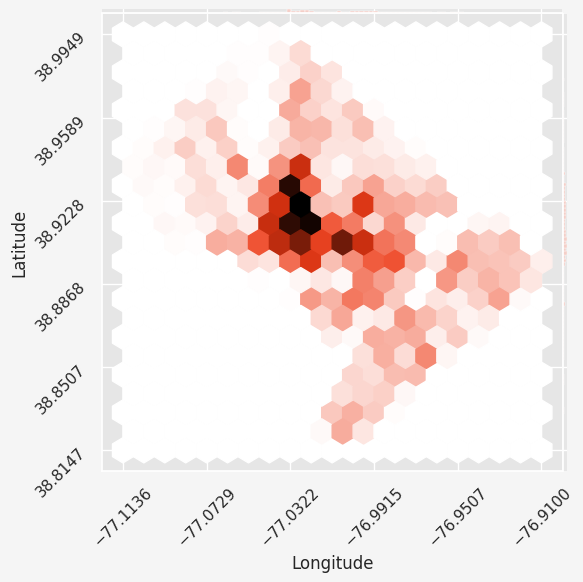

In [7]:
# Crimes based on Latitude and Longitude

plt.figure(figsize=(20, 20))
ax = sns.jointplot(x=df['longitude'], y=df['latitude'], kind='hex', gridsize=20, 
                   color=palette[0],marginal_ticks=False,ratio=100
                  )
ax.ax_marg_y.set_yticks(np.linspace(min(df['latitude']), max(df['latitude']), 6))  
ax.ax_marg_x.set_xticks(np.linspace(min(df['longitude']), max(df['longitude']), 6))  
# plt.tight_layout()
# plt.title("Crimes based on Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
ax.savefig('./dc_crime_overview.png',dpi=150)

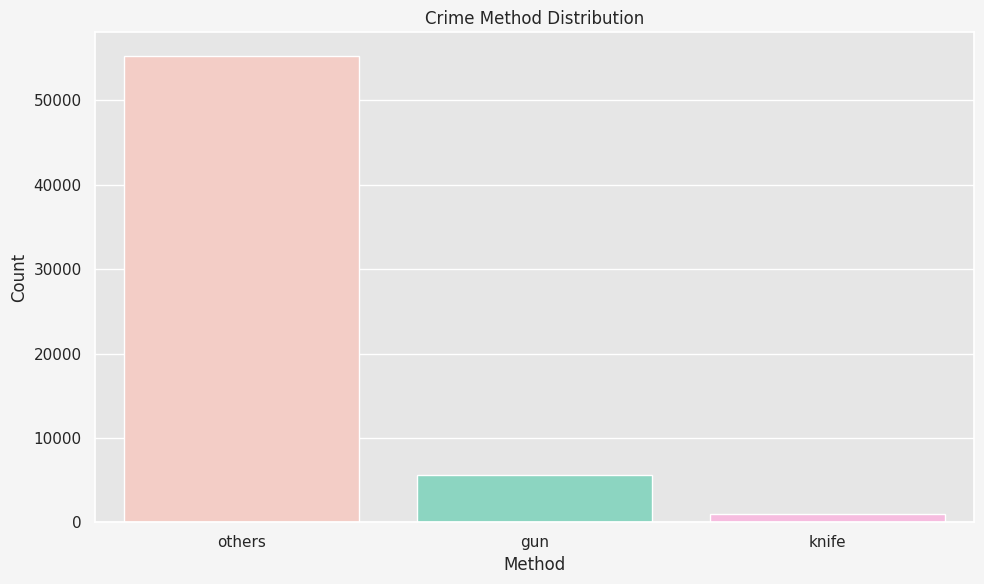

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='method', palette = palette)
plt.title('Crime Method Distribution')
plt.xlabel('Method')
plt.ylabel('Count')
plt.tight_layout()

In [9]:
df['offense'].value_counts().index

Index(['theft/other', 'theft f/auto', 'motor vehicle theft', 'robbery',
       'assault w/dangerous weapon', 'burglary', 'homicide', 'sex abuse',
       'arson'],
      dtype='object', name='offense')

In [10]:
df.loc[df['offense']=='ASSAULT W/DANGEROUS WEAPON','offense']='ASSAULT W/WEAPON'
# df.loc[df['offense']=='ASSAULT W/DANGEROUS WEAPON','offense']='ASSAULT W/WEAPON'

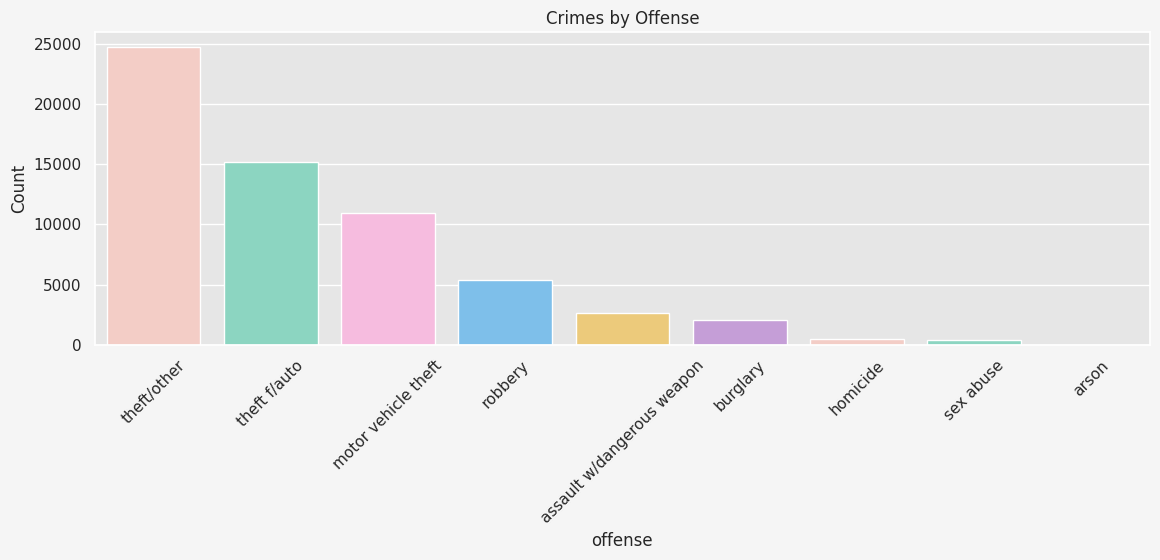

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='offense',palette=palette, order=df['offense'].value_counts().index)
plt.title('Crimes by Offense')
# plt.xlabel('Offense')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
# plt.savefig('crime_by_offense_type.png',dpi=150)

In [12]:
df['offense'].value_counts()

offense
theft/other                   24710
theft f/auto                  15197
motor vehicle theft           10924
robbery                        5400
assault w/dangerous weapon     2669
burglary                       2044
homicide                        475
sex abuse                       390
arson                            17
Name: count, dtype: int64

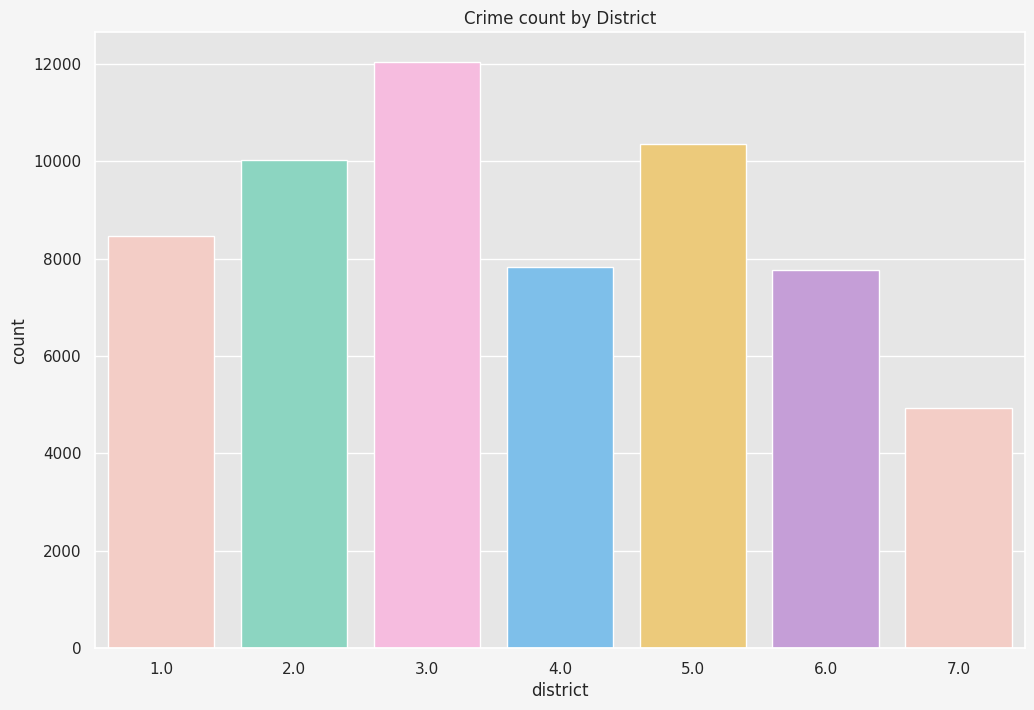

In [13]:
# Exploring crime count by district
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='district',palette=palette)
plt.title("Crime count by District")
plt.show()

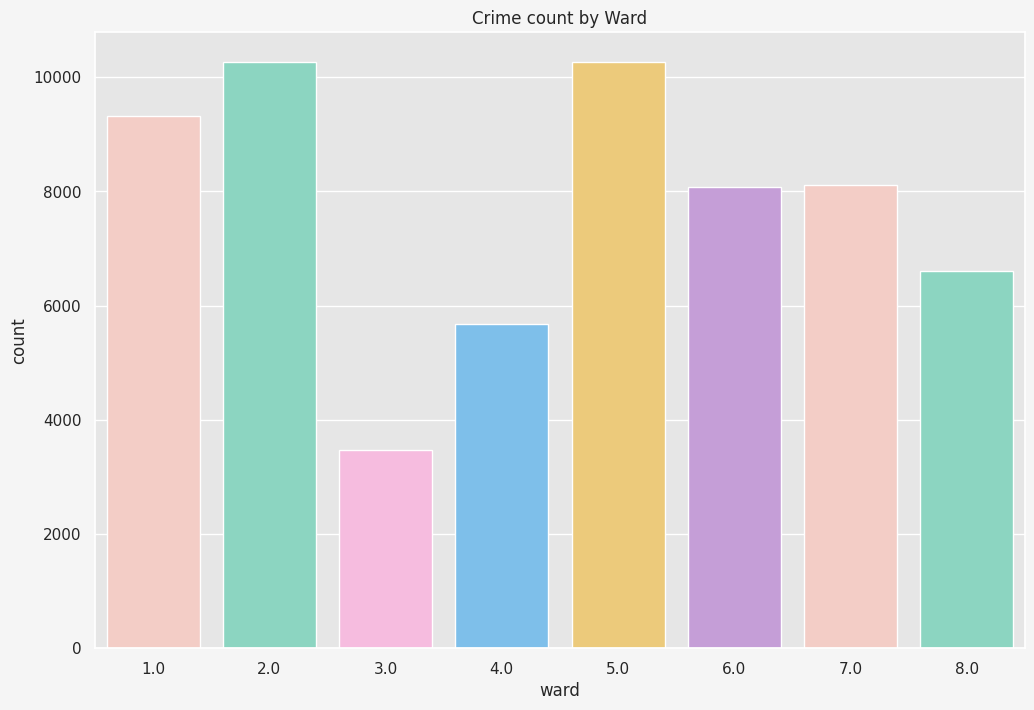

In [14]:
# Exploring crime count by district
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='ward',palette=palette)
plt.title("Crime count by Ward")
plt.show()

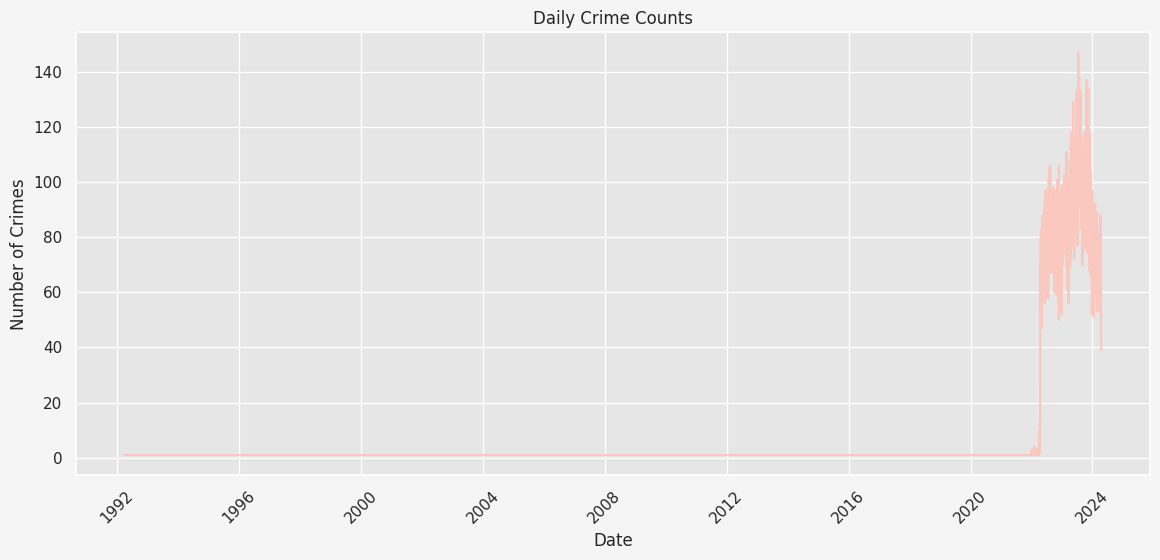

In [15]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

daily_counts = df['start_date'].dt.date.value_counts().sort_index()
weekly_counts = df['start_date'].dt.to_period('W').value_counts().sort_index()
monthly_counts = df['start_date'].dt.to_period('M').value_counts().sort_index()

# Daily
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, color = palette[0])
plt.title('Daily Crime Counts')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

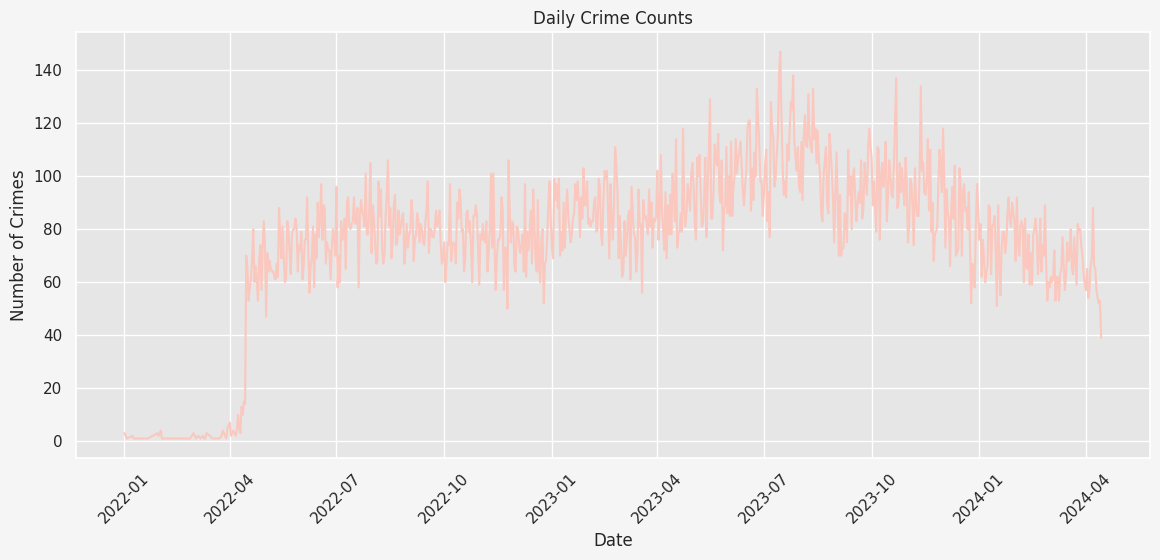

In [16]:
df=df[df['start_date'].dt.year>2021]
daily_counts = df['start_date'].dt.date.value_counts().sort_index()
weekly_counts = df['start_date'].dt.to_period('W').value_counts().sort_index()
monthly_counts = df['start_date'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, color = palette[0])
plt.title('Daily Crime Counts')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

In [31]:
df.offense.value_counts().index

Index(['theft/other', 'theft f/auto', 'motor vehicle theft', 'robbery',
       'assault w/dangerous weapon', 'burglary', 'homicide', 'sex abuse',
       'arson'],
      dtype='object', name='offense')

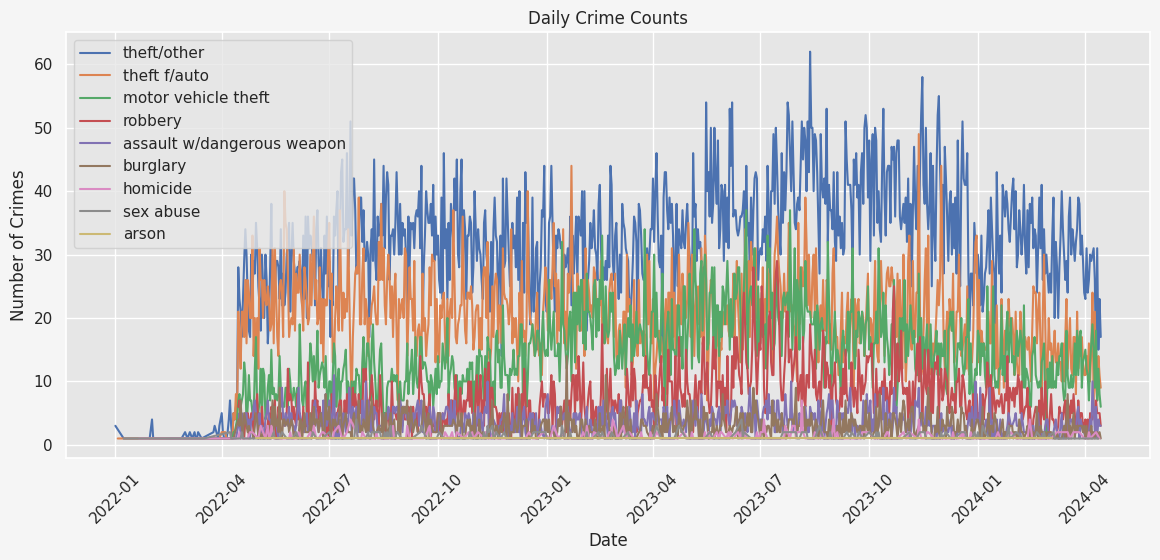

In [37]:
plt.figure(figsize=(12,6))
for o in df.offense.value_counts().index:
    daily_counts = df.loc[df.offense==o,'start_date'].dt.date.value_counts().sort_index()
    plt.plot(daily_counts.index, daily_counts.values,label=o)
    
plt.title('Daily Crime Counts')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

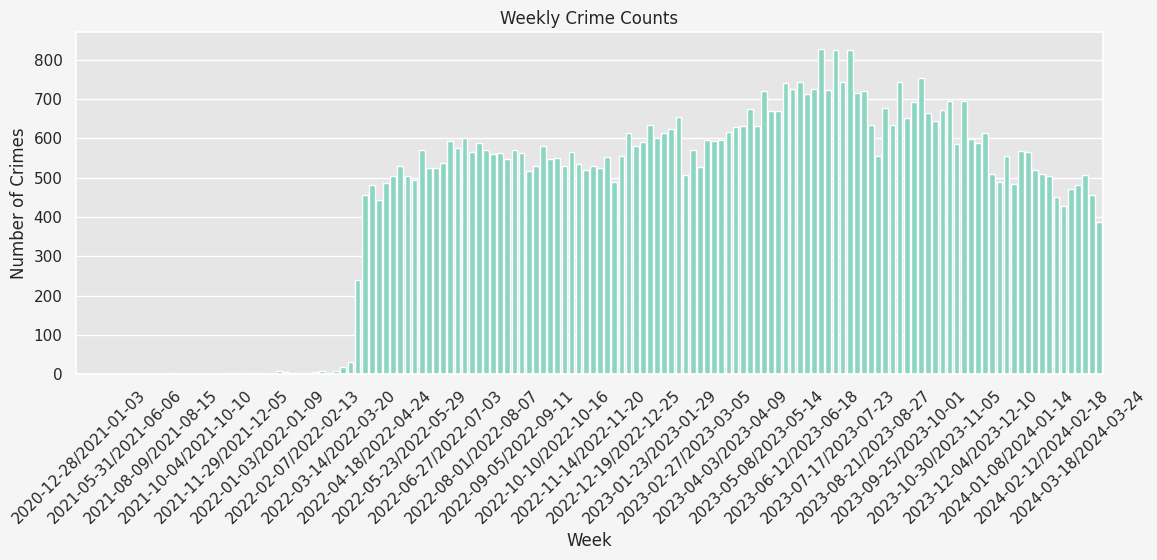

In [51]:
# Weekly
plt.figure(figsize=(12,6))
sns.barplot(x=weekly_counts.index.astype(str), y=weekly_counts.values, color=palette[1])
locs, labels = plt.xticks()
plt.xticks(locs[::5], weekly_counts.index.astype(str)[::5], rotation=45)

plt.title('Weekly Crime Counts')
plt.xlabel('Week')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

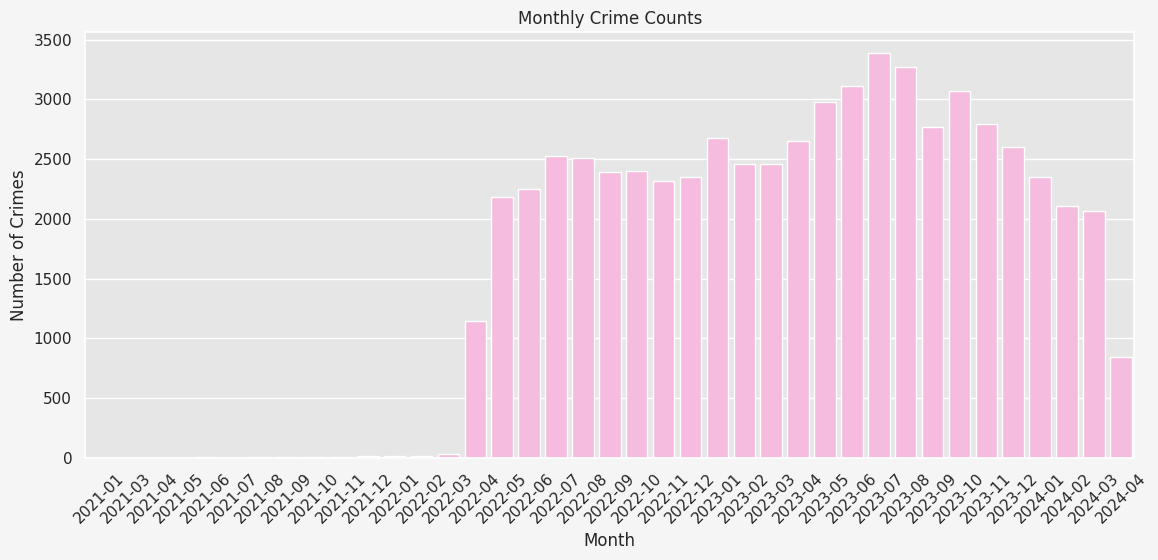

In [52]:
# Monthly
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values,color=palette[2])
plt.title('Monthly Crime Counts')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1162838/423166062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=days, y=weekday_counts, palette=palette)
/tmp/ipykernel_1162838/423166062.py:6: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=days, y=weekday_counts, palette=palette)


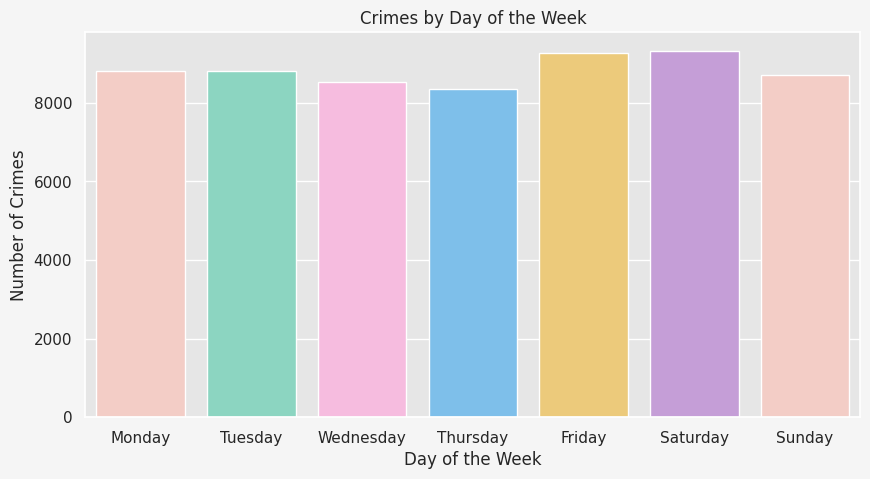

In [53]:
df['day_of_week'] = df['start_date'].dt.dayofweek
weekday_counts = df['day_of_week'].value_counts().sort_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
sns.barplot(x=days, y=weekday_counts, palette=palette)
plt.title('Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

In [90]:
## add data
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
df.index=pd.RangeIndex(start=0,stop=df.shape[0])
df=df.reset_index()

In [91]:
df['month']=df['start_date'].dt.month
df['day_of_week'] = df['start_date'].dt.dayofweek
df['hour'] = df['start_date'].dt.hour

In [92]:
metro_lines = gpd.read_file('./data/dc-maps/maps/metro-lines.geojson')
atm = gpd.read_file('./data/dc-maps/maps/atm-banking.geojson')
banks = gpd.read_file('./data/dc-maps/maps/bank-locations.geojson')
gas = gpd.read_file('./data/dc-maps/maps/gas-stations.geojson')
hospitals = gpd.read_file('./data/dc-maps/maps/hospitals.geojson')
# benches = gpd.read_file('./data/dc-maps/maps/benches.geojson') # toomany
dc_boundary = gpd.read_file('./data/dc-maps/maps/dc-boundary.geojson')
district = gpd.read_file('./data/dc-maps/maps/district-mask.geojson')
libraries = gpd.read_file('./data/dc-maps/maps/libraries.geojson')
metro_stations=gpd.read_file('./data/dc-maps/maps/metro-station-entrances-district.geojson')
parks = gpd.read_file('./data/dc-maps/maps/national-parks.geojson')
museums = gpd.read_file('./data/dc-maps/maps/museums-in-dc.geojson')
police_stations = gpd.read_file('./data/dc-maps/maps/police-stations.geojson')
shuttle_bus = gpd.read_file('./data/dc-maps/maps/shuttle-bus-stops.geojson')
shopping_centers = gpd.read_file('./data/dc-maps/maps/shopping-centers.geojson')
camera = gpd.read_file('./data/dc-maps/maps/camera-enforcement-locations.geojson')
grocery=gpd.read_file('./data/dc-maps/maps/grocery-store-locations.geojson')
metro_bus = gpd.read_file('./data/dc-maps/maps/metro-bus-stops.geojson')
post_office = gpd.read_file('./data/dc-maps/maps/post-offices.geojson')
schools = gpd.read_file('./data/dc-maps/maps/public-schools.geojson')

In [93]:
def fishnet(geometry, step=0.01):
    bounds = geometry.bounds
    xmin,ymin,xmax,ymax=bounds
    result = []
    for i in np.arange(xmin, xmax, step):
        for j in np.arange(ymin, ymax, step):
            b = box(i, j, i+step, j+step)
            g = geometry.intersection(b)
            if g.is_empty:
                continue
            result.append(g)
    return result

# make crime_data a geopanda frame
df['geometry'] = gpd.points_from_xy(df['longitude'], df['latitude'])
crime_data = gpd.GeoDataFrame(df, crs="EPSG:4326")


polygon=dc_boundary['geometry'][0]
res=fishnet(polygon, 0.005)
nets=gpd.GeoDataFrame(geometry=res)
nets['index']=range(len(nets))

In [84]:
def count_close_building(crime_data, buildings, new_col_name='counts', max_distance=0.001):
    data=crime_data
    temp=data[['index','geometry']]
    buildings_location=buildings[['geometry']]

    # Find events within the buffered_museums
    # 1 degree is approximately 111 km;
    temp_buffered = gpd.sjoin_nearest( temp, buildings_location, how='left',max_distance=max_distance,distance_col='distance')
    temp_buffered=temp_buffered[~temp_buffered['index_right'].isnull()]

    counts=pd.DataFrame(temp_buffered.groupby('index').size().rename(new_col_name))

    temp_merged=temp.merge(counts,left_on='index', right_on='index', how='left').fillna(0)

    return temp_merged

In [94]:
crime_data

,level_0,index,offensegroup,offense-text,offensekey,sector,ucr-rank,location,neighborhood_cluster,census_tract,...,offense,octo_record_id,anc,report_dat,method,latitude,month,day_of_week,hour,geometry
0,0,0,violent,robbery,violent|robbery,3D3,4,"38.9228569969,-77.0423881078",cluster 1,3901.0,...,robbery,NaN,1C,"1/26/2024, 1:47:11 AM",others,38.922857,1,4,0,POINT (-77.04239 38.92286)
1,1,1,property,burglary,property|burglary,3D3,5,"38.9079088435,-77.0239664272",cluster 7,4902.0,...,theft,NaN,2G,"3/13/2024, 3:00:37 AM",others,38.907909,3,2,1,POINT (-77.02397 38.90791)
2,2,2,property,theft/other,property|theft/other,6D2,6,"38.8731935018,-76.9700033858",cluster 34,7709.0,...,theft,NaN,7B,"4/20/2022, 6:21:32 PM",others,38.873194,4,2,17,POINT (-76.97000 38.87319)
3,3,3,property,motor vehicle theft,property|motor vehicle theft,1D1,8,"38.8838828674,-77.0245692132",cluster 9,10202.0,...,theft,NaN,6D,"5/1/2023, 4:36:19 PM",others,38.883883,5,0,15,POINT (-77.02457 38.88388)
4,4,4,property,theft/other,property|theft/other,5D2,6,"38.9215847053,-76.9937555941",cluster 22,9102.0,...,theft,NaN,5C,"2/21/2024, 12:01:28 PM",others,38.921585,2,2,11,POINT (-76.99376 38.92158)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61783,61783,61783,property,theft/other,property|theft/other,4D1,6,"38.9699228716,-77.0170969293",cluster 17,1902.0,...,theft,NaN,4B,"7/30/2023, 10:47:32 AM",others,38.969923,7,5,13,POINT (-77.01710 38.96992)
61784,61784,61784,property,theft/other,property|theft/other,4D2,6,"38.953089945,-77.0006269086",cluster 19,9508.0,...,theft,NaN,5A,"2/15/2024, 9:19:58 AM",others,38.953090,2,2,22,POINT (-77.00063 38.95309)
61785,61785,61785,property,theft f/auto,property|theft f/auto,1D1,7,"38.9042098573,-77.012175643",cluster 8,4704.0,...,theft,NaN,6E,"2/16/2024, 8:04:58 PM",others,38.904210,2,4,3,POINT (-77.01218 38.90421)
61786,61786,61786,property,theft/other,property|theft/other,6D2,6,"38.8689186523,-76.9594761766",cluster 34,9901.0,...,theft,NaN,7B,"2/7/2024, 9:59:16 PM",others,38.868919,2,2,0,POINT (-76.95948 38.86892)


In [95]:
temp=count_close_building(crime_data,museums,'museums_count')
crime_data.loc[:,'museums_count']=temp.loc[:,'museums_count']

col_name='gas'
temp=count_close_building(crime_data,gas,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='metro_bus'
temp=count_close_building(crime_data,metro_bus,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='atm'
temp=count_close_building(crime_data,atm,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='banks'
temp=count_close_building(crime_data,banks,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='grocery'
temp=count_close_building(crime_data,grocery,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='metro_stations'
temp=count_close_building(crime_data,metro_stations,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='post_office'
temp=count_close_building(crime_data,post_office,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='schools'
temp=count_close_building(crime_data,schools,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='libraries'
temp=count_close_building(crime_data,libraries,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]

col_name='shuttle_bus'
temp=count_close_building(crime_data,shuttle_bus,col_name)
crime_data.loc[:,col_name]=temp.loc[:,col_name]



# cluster

In [97]:
crime_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 61788 entries, 0 to 61787
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   level_0               61788 non-null  int64         
 1   index                 61788 non-null  int64         
 2   offensegroup          61788 non-null  object        
 3   offense-text          61788 non-null  object        
 4   offensekey            61788 non-null  object        
 5   sector                61348 non-null  object        
 6   ucr-rank              61788 non-null  int64         
 7   location              61788 non-null  object        
 8   neighborhood_cluster  61781 non-null  object        
 9   census_tract          61765 non-null  float64       
 10  longitude             61788 non-null  float64       
 11  end_date              56797 non-null  datetime64[ns]
 12  shift                 61788 non-null  object        
 13  district

In [100]:
crime_data.loc[df['offense']=='theft f/auto','offense']='theft'
crime_data.loc[df['offense']=='theft/other', 'offense']='theft'
crime_data.loc[df['offense']=='motor vehicle theft', 'offense']='theft'
crime_data.loc[df['offense']=='burglary', 'offense']='theft'

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [101]:
le=LabelEncoder()
offense_label=le.fit_transform(df['offense'])

In [108]:
X=crime_data[['month','day_of_week','hour','longitude','latitude']]
X=crime_data[['day_of_week','hour','longitude','latitude','gas','atm']]
X=(X-X.mean())/X.std()

In [109]:
X

,day_of_week,hour,longitude,latitude,gas,atm
0,0.487518,-2.050829,-0.999794,0.507239,-0.283211,-0.431267
1,-0.511049,-1.895299,-0.465302,0.010688,3.530879,-0.431267
2,-0.511049,0.593187,1.100400,-1.142493,3.530879,-0.431267
3,-1.509616,0.282126,-0.482791,-0.787411,-0.283211,-0.431267
4,-0.511049,-0.339995,0.411245,0.464976,-0.283211,-0.431267
...,...,...,...,...,...,...
61783,0.986802,-0.028935,-0.265988,2.070682,-0.283211,-0.431267
61784,-0.511049,1.370838,0.211879,1.511522,-0.283211,-0.431267
61785,0.487518,-1.584238,-0.123200,-0.112185,-0.283211,-0.431267
61786,-0.511049,-2.050829,1.405840,-1.284495,3.530879,-0.431267


In [110]:
X_reduced=PCA(n_components=2).fit_transform(X)

In [111]:
le.classes_

array(['arson', 'assault w/dangerous weapon', 'homicide', 'robbery',
       'sex abuse', 'theft'], dtype=object)

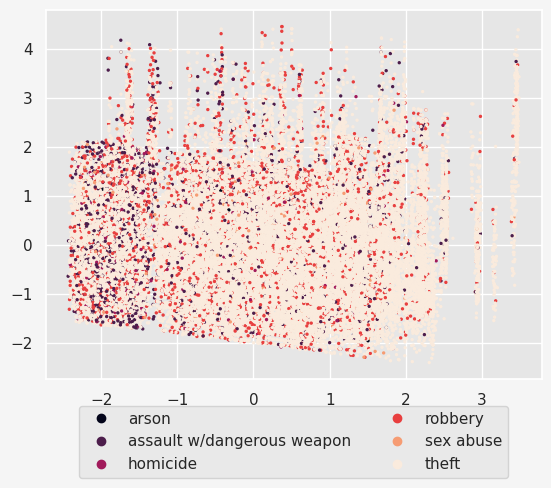

In [112]:
scatter=plt.scatter(X_reduced[:,0],X_reduced[:,1],c=offense_label,s=2)

plt.legend(handles=scatter.legend_elements()[0], labels=['arson', 'assault w/dangerous weapon', 'homicide', 'robbery',
       'sex abuse', 'theft']
           ,loc='upper center', bbox_to_anchor=(0.5,-0.05),ncol=2)